# 03 EDA

- Descriptive Statistics
- Grouping
- Correlation
- ANOVA

# Exploratory Data Analysis

> an approach to analyze data in order to:
- summarize main characteristics of the data 
- gain better understanding of the dataset.
- uncover relationships between different variables.
- extract important variables to solve the problem.

### The main question we are trying to answer is:
- **“What are the characteristics that have the most impact on the car price?”**

## Import Data

In [260]:
import pandas as pd
import numpy as np

In [261]:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyze Individual Feature Patterns using Visualization

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
# understand types of variables
# find the right visualization method for the variable
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [264]:
# calculate the correlation between variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [265]:
# correlation
df[['bore','stroke' ,'compression-ratio','horsepower','price']].corr()

,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,-0.055390,0.001263,0.566936,0.543155
stroke,-0.055390,1.000000,0.187923,0.098462,0.082310
compression-ratio,0.001263,0.187923,1.000000,-0.214514,0.071107
horsepower,0.566936,0.098462,-0.214514,1.000000,0.809575
price,0.543155,0.082310,0.071107,0.809575,1.000000


## Continuous numerical variables

>Continuous numerical variables are variables that may contain any value within some range. 
- Continuous numerical variables can have the type "int64" or "float64". 
- Visualize continuous numerical variables using scatterplots with fitted lines

### Find the scatterplot of "engine-size" and "price"

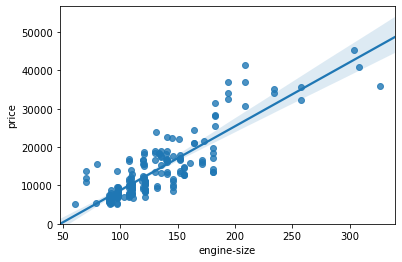

In [266]:
# Examine engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,);

In [267]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### correlation between 'engine-size' and 'price' is approximately 0.87

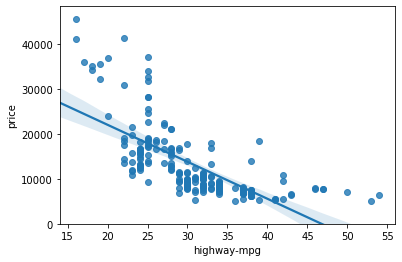

In [268]:
### Highway mpg is a potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,);

In [269]:
# Examine the correlation between 'highway-mpg' and 'price' 
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### correlation between 'highway-mpg' and 'price' is approximately -0.704

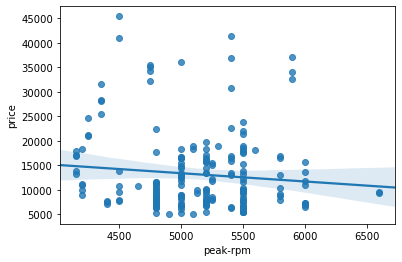

In [270]:
# see if "Peak-rpm" as a predictor variable of "price".
sns.regplot(x="peak-rpm", y="price", data=df);

In [271]:
# examine the correlation between 'peak-rpm' and 'price' 
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### correlation between 'peak-rpm' and 'price' is approximately -0.101

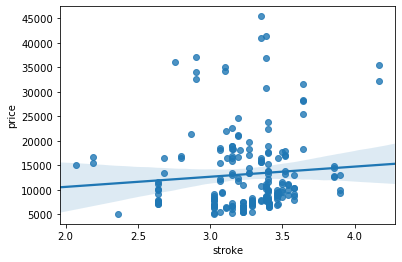

In [272]:
# See if "stroke" as a predictor variable of "price".
sns.regplot(x="stroke", y="price", data=df);

In [273]:
# Examine the correlation between 'stroke' and 'price' and see it's approximately -0.101616
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


## Categorical variables
> Categorical variables are variables that describe a 'characteristic' of a data unit and selected from a small group of categories.
- Categorical variables can have the type "object" or "int64".
- Visualize categorical variables using boxplots

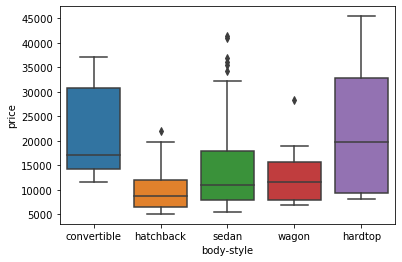

In [274]:
# Look at the relationship between "body-style" and "price".
sns.boxplot(x="body-style", y="price", data=df);

## Distributions of price between the different body-style categories have a significant overlap

>body-style would not be a good predictor of price. 

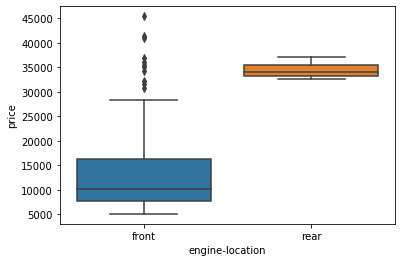

In [275]:
# Examine engine "engine-location" and "price":
sns.boxplot(x="engine-location", y="price", data=df);

### Distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

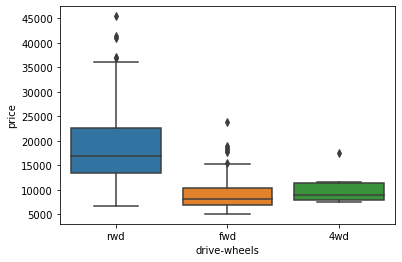

In [276]:
# Examine "drive-wheels" and "price"
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df);

### Distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

# Descriptive Statistical Analysis

## Describe
> computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

>Show:
- count of that variable
- mean
- standard deviation (std)
- minimum value
- IQR (Interquartile Range: 25%, 50% and 75%)
- maximum value

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/01_describe.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/02_value_counts.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/03_box_plot.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/04_drive_wheels_price_box_plot.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/05_scatter_plot.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/01_descriptive/06_engine_size_price_scatter_plot.png", width=800, height=600>|
</p>

In [277]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [278]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Summarize Categorical Variables 

In [279]:
# how many units of each characteristic/variable we have. 
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

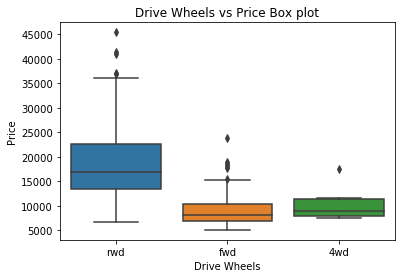

In [280]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.title("Drive Wheels vs Price Box plot")
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.savefig('../figs/03_EDA/01_descriptive/drive_wheels_price_box_plot.png')

In [281]:
# convert the series to a Dataframe as follows :
# save the results to the dataframe "drive_wheels_counts" 
# rename the column 'drive-wheels' to 'value_counts'.

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [282]:
# rename the index to 'drive-wheels':
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [283]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


### Examining the value counts of the engine location would not be a good predictor variable for the price. 

>This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. 

>Thus, we are not able to draw any conclusions about the engine location.

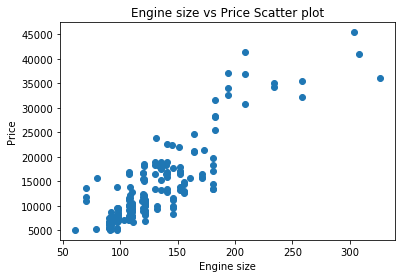

In [284]:
# Scatterplot of Engine size vs Price
x = df["engine-size"] 
y = df["price"] 
plt.scatter(x,y)
plt.title("Engine size vs Price Scatter plot")
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.savefig('../figs/03_EDA/01_descriptive/engine_size_price_scatter_plot.png')

# Grouping

## Group data by categories using single or multiple variable

<p align="center"> 
<img src="../images/03_EDA/02_groupby/01_groupby.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/02_groupby/02_pivot.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/02_groupby/03_heatmap.png", width=800, height=600>|
</p>

## Group by the variable "drive-wheels"
> 3 different categories of drive wheels.

In [285]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [286]:
# which type of drive wheel is most valuable
# group "drive-wheels" and then average
# select the columns 'drive-wheels', 'body-style' and 'price', 
# then assign it to the variable "df_group_one".

df_group_one = df[['drive-wheels','body-style','price']]

In [287]:
#calculate the average price for each of the different categories of data.
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


>rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

### Group with multiple variables

In [288]:
# group by both 'drive-wheels' and 'body-style'.
# groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'
#store the results in the variable 'grouped_test1'.

# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


>This grouped data is much easier to visualize when it is made into a pivot table

### Visualize with Pivot Table

> pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

- drive-wheel as the rows of pivot table
- pivot body-style as columns of pivot table

In [289]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [290]:
# missing data for some of the pivot cells
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Find the average "price" of each car based on "body-style" 

In [291]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [292]:
df_group_body_style = df[['body-style','price']]
df_group_body_style.head()

,body-style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [293]:
grouped_body_style = df_group_body_style.groupby(['body-style'],as_index=False).mean()
grouped_body_style

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


## Visualize with Heatmap
>Relationship between Body Style vs Price.

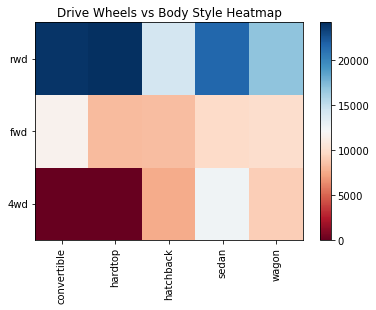

In [294]:
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#insert title
plt.title("Drive Wheels vs Body Style Heatmap")

#rotate label 
plt.xticks(rotation=90)

fig.colorbar(im)
plt.savefig('../figs/03_EDA/02_groupby/drive_wheels_body_style_heatmap.png')

### Heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. 

> Heatmap visualizes how the price is related to 'drive-wheel' and 'body-style'.



# Correlation

Look at the correlation of the variables with the car price, to find how is the car price dependent on this variable?

## Correlation and Causation
> Correlation: a measure of the extent of interdependence between variables.

>Causation: the relationship between cause and effect between two variables.

> Correlation does not imply causation

<p align="center"> 
<img src="../images/03_EDA/04_correlation/01_correlation.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/04_correlation/02_positive.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/04_correlation/03_negative.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/04_correlation/04_weak.png", width=800, height=600>|
</p>

## Positive Linear Relationship 

### Correlation between engine-size and price

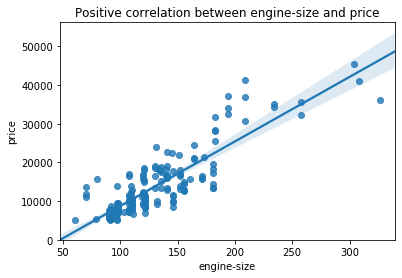

In [295]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.title("Positive correlation between engine-size and price")
plt.savefig('../figs/03_EDA/05_pearson/positive_correlation_engine_size_price_scatterplot.png')

## Negative Linear Relationship 

### Correlation between highway-mpg and price

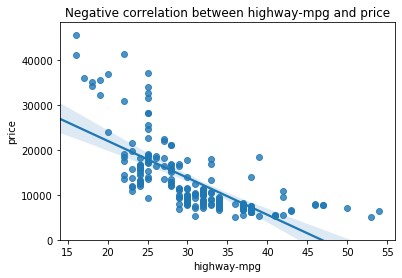

In [296]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.title("Negative correlation between highway-mpg and price")
plt.savefig('../figs/03_EDA/05_pearson/negative_correlation_highway_mpg_price_scatterplot.png')

## Weak Correlation

### Correlation between peak-rpm and prize

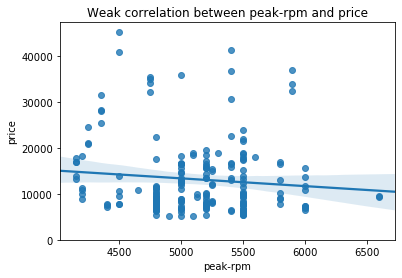

In [297]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.title("Weak correlation between peak-rpm and price")
plt.savefig('../figs/03_EDA/05_pearson/weak_correlation_peak_rpm_price_scatterplot.png')

## Pearson Correlation 

>The Pearson Correlation measures the linear dependence between two variables X and Y.

>Pearson correlation method will give you
two values: 
- Pearson Correlation Coefficient 
- P-value

### Pearson Correlation Coefficient 
a value between -1 and 1 inclusive, where:

- close to +1: large positive correlation.
- close to -1: large negative correlation.
- close to  0: no relationship

### P-value
probability value that the correlation between the two variables is statistically significant

- p-value<0.001: strong certainty in the result
- p-value<0.05: moderate certainty in the result
- p-value<0.1: weak certainty in the result
- p-value>0.1: no certainty in the result

### Strong correlation

- Correlation coefficient close to +1 or -1 
- P-value less than 0.001

<p align="center"> 
<img src="../images/03_EDA/05_pearson/01_pearson.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/05_pearson/02_noisiness_direction.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/05_pearson/03_pearson_coef_p_value.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/05_pearson/04_correlation_heatmap.png", width=800, height=600>|
</p>

In [298]:
from scipy import stats

In [299]:
# calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}")  

Pearson Correlation Coefficient = 0.585
P-value  = 8.076488270733218e-20


### P-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [300]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = 0.810
P-value  = 6.369057428260101e-48


### P-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.810, close to 1)

In [301]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = 0.691
P-value  = 8.016477466159556e-30


In [302]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print(f"The Pearson Correlation Coefficient is {pearson_coef:.3f} with p-value {p_value}")  

The Pearson Correlation Coefficient is 0.751 with p-value 9.200335510481646e-38


In [303]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = 0.834
P-value  = 2.189577238894065e-53


In [304]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = 0.872
P-value  = 9.265491622198389e-64


In [305]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = 0.543
P-value  = 8.049189483935489e-17


In [306]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = -0.687
P-value  = 2.321132065567641e-29


In [307]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f"Pearson Correlation Coefficient = {pearson_coef:.3f}")
print(f"P-value  = {p_value}") 

Pearson Correlation Coefficient = -0.705
P-value  = 1.7495471144476358e-31


In [308]:
# calculate Pearson Correlation 
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## Correlation Heatmap

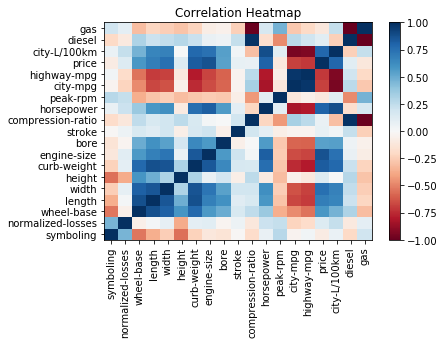

In [309]:
fig, ax = plt.subplots()
im = ax.pcolor(df.corr(), cmap='RdBu')

#label names
row_labels = df.corr().columns
col_labels = df.corr().index

#move ticks and labels to the center
ax.set_xticks(np.arange(df.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df.corr().shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#insert title
plt.title("Correlation Heatmap")

#rotate label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.savefig('../figs/03_EDA/05_pearson/correlation_heatmap.png')

# ANOVA: Analysis of Variance
>statistical method used to test whether there are significant differences between the means of two or more groups. 

## ANOVA returns two parameters:

> F-test score: 
- calculates how much the actual means deviate from the assumption
- ANOVA assumes the means of all groups are the same
- larger score means there is a larger difference between the means.

>P-value: 
- P-value tells how statistically significant is our calculated score value.

### If price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

<p align="center"> 
<img src="../images/03_EDA/03_anova/01_anova.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/02_price_make.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/03_small_f_score.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/04_large_f_score.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/05_honda_subaru.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/06_honda_jaguar.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/03_EDA/03_anova/07_f_val_p_val.png", width=800, height=600>|
</p>

## Find the average "price" of each car based on "make" 

In [310]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [311]:
df_group_make = df[['make','price']]
df_group_make.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


In [312]:
grouped_make = df_group_make.groupby(['make'],as_index=False).mean()
grouped_make.sort_values('price', inplace=True)
grouped_make

,make,price
3,chevrolet,6007.000000
4,dodge,7875.444444
14,plymouth,7963.428571
5,honda,8184.692308
18,subaru,8541.250000
6,isuzu,8916.500000
11,mitsubishi,9239.769231
16,renault,9595.000000
19,toyota,9885.812500
20,volkswagen,10077.500000


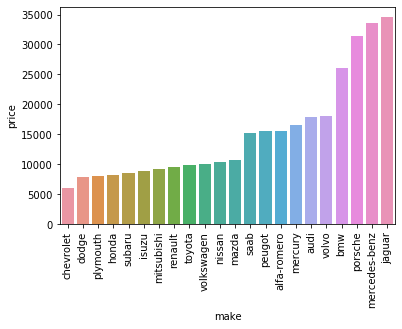

In [313]:
sns.barplot(x="make", y="price", data=grouped_make)
plt.xticks(rotation=90);

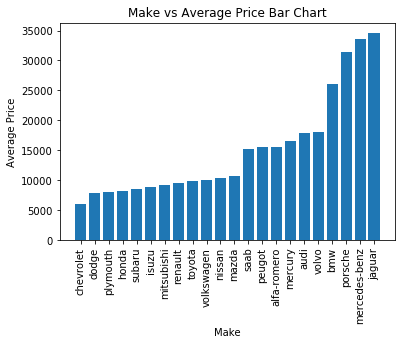

In [314]:
# Chart of Make vs Average Price
plt.bar(grouped_make.make,grouped_make.price)
plt.title("Make vs Average Price Bar Chart")
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.savefig('../figs/03_EDA/03_anova/make_avg_price_bar_chart.png')

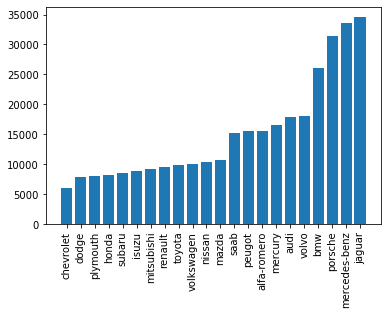

In [315]:
grouped_make = df[["make","price"]].groupby(["make"])
avg_price = [grouped_make.get_group(make)["price"].mean() for make in set(df["make"])]
make = [make for make in set(df["make"])]
grouped_make = {k:v for k,v in zip(make,avg_price)}
grouped_make = dict(sorted(grouped_make.items(), key=lambda kv: kv[1]))
plt.bar(grouped_make.keys(), grouped_make.values())
plt.xticks(rotation=90);

## ANOVA between "Honda" and "Subaru"

In [316]:
df_anova = df[["make","price"]]
df_anova.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


In [317]:
grouped_anova = df_anova.groupby(["make"])

In [318]:
hondas = grouped_anova.get_group("honda")["price"]
hondas

29     6479.0
30     6855.0
31     5399.0
32     6529.0
33     7129.0
34     7295.0
35     7295.0
36     7895.0
37     9095.0
38     8845.0
39    10295.0
40    12945.0
41    10345.0
Name: price, dtype: float64

In [319]:
subarus = grouped_anova.get_group("subaru")["price"]
subarus

134     5118.0
135     7053.0
136     7603.0
137     7126.0
138     7775.0
139     9960.0
140     9233.0
141    11259.0
142     7463.0
143    10198.0
144     8013.0
145    11694.0
Name: price, dtype: float64

In [320]:
f_val, p_val = stats.f_oneway(hondas,subarus)
print('ANOVA between "Honda" and "Subaru" results:')   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")

ANOVA between "Honda" and "Subaru" results:
F-test score = 0.19744030127462606
P-value = 0.6609478240622193


## ANOVA between "Honda" and "Jaguar"

In [321]:
jaguars = grouped_anova.get_group("jaguar")["price"]
jaguars

44    32250.0
45    35550.0
46    36000.0
Name: price, dtype: float64

In [322]:
f_val, p_val = stats.f_oneway(hondas,jaguars)
print('ANOVA between "Honda" and "Jaguar" results:')   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")

ANOVA between "Honda" and "Jaguar" results:
F-test score = 400.925870564337
P-value = 1.0586193512077862e-11


## Drive Wheels
> ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. 

> ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [323]:
# See if different types 'drive-wheels' impact 'price'
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [324]:
df_gptest.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [325]:
# obtain the values of the method group 
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [326]:
# obtain the F-test score and P-value.
# ANOVA
fwds, rwds, owds = grouped_test2.get_group('fwd')['price'], \
                   grouped_test2.get_group('rwd')['price'], \
                   grouped_test2.get_group('4wd')['price']
f_val, p_val = stats.f_oneway(fwds, rwds, owds)   
print("ANOVA results:")   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")

ANOVA results:
F-test score = 67.95406500780399
P-value = 3.3945443577151245e-23


### Large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. 

### Does all three tested groups are all this highly correlated?



### fwd and rwd

In [327]:
f_val, p_val = stats.f_oneway(fwds, rwds)  
print("ANOVA results:")   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")

ANOVA results:
F-test score = 130.5533160959111
P-value = 2.2355306355677845e-23


### 4wd and rwd

In [328]:
f_val, p_val = stats.f_oneway(owds, rwds)  
print("ANOVA results:")   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")   

ANOVA results:
F-test score = 8.580681368924756
P-value = 0.004411492211225333


### 4wd and fwd

In [329]:
f_val, p_val = stats.f_oneway(owds, fwds)  
print("ANOVA results:")   
print(f"F-test score = {f_val}")
print(f"P-value = {p_val}")

ANOVA results:
F-test score = 0.665465750252303
P-value = 0.41620116697845666


 # Conclusion: Important Variables
>which variables are important to take into account when predicting the car price?

## Continuous numerical variables:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

## Categorical variables:

- Drive-wheels

### Building machine learning models to automate the analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.